# 拼接测试数据和仿真数据

选取test 的14个真实数据的噪声声音， 拼入仿真数据中

In [37]:
import numpy as np
import pickle

file_to_read = open('train_low_None_.pickle', 'rb')
tmp = pickle.load(file_to_read)
data = tmp.values


In [38]:
data = data[:, :-1]

读取测试数据

In [4]:
file_to_read = open('test__None_.pickle', 'rb')
tmp1 = pickle.load(file_to_read)
test_data = tmp1.values
test_data = test_data[2:, :-1]


# 使用numpy partition 和广播机制解决这个问题

先去test数据的前800小

In [5]:
mask_list = []
for i in range(12):
    mask2 = np.partition(test_data[i], -200)[-200]
    mask_list.append(mask2)
    test_data[i] = test_data[i] *(test_data[i] < mask2)
print(mask_list)    

[0.07019129229416528, 0.07421625079974699, 0.05484086371389453, 0.022481062962028467, 0.011769476347996344, 0.018685468400203582, 0.11328404511645135, 0.02101827676240194, 0.01835347620963363, 0.015580181861808184, 0.08958327051506093, 0.08395128634173753]


In [39]:


for i in range(5):
    mask1 = np.partition(data[i], -201)[-201]
    #print(mask1)
    
    data[i] = data[i] *(data[i] >= mask1)
    #print(data[i])
    #break



In [14]:
count = 0
test_data1 = test_data[1].tolist()
for i in range(len(test_data[1])):
    if test_data1[i] > 0:
        count += 1 
count        

800

In [40]:
count2= 0
data2 = data[0].tolist()
for i in range(len(data[0])):
    if data2[i] == 0:
        count2 += 1 
count2  

800

In [41]:
a = np.array(data2)
b = np.array(test_data1)
x = b[b >0]
print(len(x))
a[a <= 0.0001] = x

800


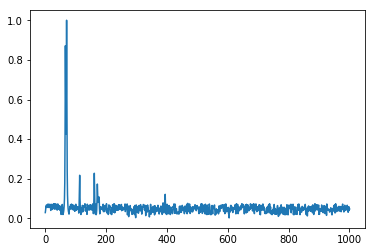

In [44]:
import matplotlib.pyplot as plt
x1 = np.linspace(0, 1001,num=1001)
y1 = a
#y1.shape
plt.plot(x1, y1)
plt.show()

In [15]:
#import time
#start = time.clock()

for i in range(13):
    a = data[i]
    index = int(np.random.randint(0,12,size = 1))
    
    b = test_data[index]
    #print(b)
    #a[a < 0.001] = b[b < mask_list[index]]
    
        
            
                

#end = time.clock()
#print(str(end-start))

[0.0 0.0 0.0 ... 0.011775016914755418 0.02224155251981437
 0.02616669553280636]


ValueError: NumPy boolean array indexing assignment cannot assign 1001 input values to the 801 output values where the mask is true

# 代码简单例子， 注意>=, <等符号

In [18]:
import time
start = time.clock()

A = np.array([5,6,7,1,4,8,9,3,2,10])
B = np.array([5,6,7,1,4,8,9,3,2,10])

mask1 = np.partition(A,-2)[-2] #取出前2大
A = A * (A >= mask1)

mask2 = np.partition(B,-2)[-2] #取出比第2大的小的8个数
B =B * (B < mask2)

A[A<7.999] = B[B>0]

print(A, mask1)
print(B, mask2)



end = time.clock()

print(str(end-start))

[ 5  6  7  1  4  8  9  3  2 10] 9
[5 6 7 1 4 8 0 3 2 0] 9
0.0010079999999987876


In [62]:
a = np.array([0,0,1,0,4,0,0,0,0,2])
b = np.array([5,6,7,0,0,8,9,3,0,10])


a[a<1] = b[b>=3]
print(a)
print(A, mask1)
print(B, mask2)


#print(a[a<1] = b[b>5])

[ 5  6  1  7  4  8  9  3 10  2]


In [228]:
a = np.array([44, 33, 88, 77, 66, 99, 11])
print(np.partition(a, -2)[-2],np.partition(a, -2), a*(a > np.partition(a, -2)[-2]))




88 [33 11 44 66 77 88 99] [ 0  0  0  0  0 99  0]


选出测试数据的关键features

In [ ]:
for i in range(186*800):
    mask = np.partition(test_data[i].flatten(), -200)[-200]
    test_data[i] = test_data[i] *(test_data[i] < mask)

In [11]:
k = np.array([[ 35,  48,  63],
...        [ 60,  77,  96],
...        [ 91, 112, 135]])

np.partition(k.flatten(), -2)[-2]
np.partition(k.flatten(), 2)[2]

60

选取测试数据中最小的number_to_keep点作为噪声

In [36]:
number_to_keep = 800

test_noise = np.zeros((14,number_to_keep))

import heapq

for i in range(len(test_data)):
    tmp = test_data[i,:-1]  #remove label
    #print(tmp)
    test_noise[i, :number_to_keep] = heapq.nsmallest(number_to_keep, tmp)
test_noise.shape    
    
#test_noise[-1, -1]

(14, 800)

In [51]:
# 提取一个光滑的仿真数据最大200个点 + 随机800个噪音


tmp_data = list(data[0,:-1])
train_noise = np.zeros((1,1001))

max_num_index_list = list(map(tmp_data.index, heapq.nlargest(200, tmp_data)))
max_num_list = heapq.nlargest(200, tmp_data)

for j in range(len(max_num_index_list)):
    train_noise[max_num_index_list[j]] = max_num_list[j]

#x1 = np.linspace(0, 1001,num=1001)
#y1 = tmp_data
#y1.shape
#plt.plot(x1, y1)
#plt.show()

IndexError: index 70 is out of bounds for axis 0 with size 1

In [44]:
#测试代码
n_features = 200

test_noise = np.zeros((14,1001))

for i in range(len(test_data)):
    tmp_data = list(data[i,:-1])  #remove the label
    
    max_num_index_list = list(map(tmp_data.index, heapq.nlargest(200, tmp_data)))
    max_num_list = heapq.nlargest(200, tmp_data)
    
    for j in range(len(max_num_index_list)):
        test_noise[i][max_num_index_list[j]] = max_num_list[j]
        
test_noise[1]

array([0., 0., 0., ..., 0., 0., 0.])

选取仿真数据中最大的n_features点作为特征

In [40]:
n_features = 200

train_data_0 = np.zeros((186*800,1001))

for i in range(len(data)):
    tmp_data = list(data[i,:-1])  #remove the label
    
    max_num_index_list = list(map(tmp_data.index, heapq.nlargest(200, tmp_data)))
    max_num_list = heapq.nlargest(200, tmp_data)
    
    for j in range(len(max_num_index_list)):
        train_data_0[i][max_num_index_list[j]] = max_num_list[j]
        
train_data_0.shape        


KeyboardInterrupt: 

In [35]:
test_noise = np.zeros((186*800,1001))
test_noise.shape

(148800, 1001)

In [ ]:
nums = [1, 8, 2, 23, 7, -4, 18, 23, 24, 37, 2]
# 最大的3个数的索引
max_num_index_list = map(nums.index, heapq.nlargest(3, nums))
max_num_list = heapq.nlargest(3, nums)

print(list(max_num_index_list),max_num_list)
